<a href="https://colab.research.google.com/github/raffeekk/ML25/blob/main/homework/homework-practice-01-linregr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинное обучение, ФКН ВШЭ

# Практическое задание 1

## Общая информация

Дата выдачи: 16.09.2016

Срок сдачи: 30.09.2016 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на hse.cs.ml+<номер группы>@gmail.com (например, hse.cs.ml+141@gmail.com для студентов группы БПМИ-141).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [12]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [13]:
def max_element(arr):
    # Your code here
    if 0 not in x:
      return None
    mask = np.where(x == 0)[0] + 1
    mask = mask[mask < len(x)]
    return np.max(x[mask])

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [14]:
def nearest_value(X, v):
    # Your code here
    return X.flat[np.abs(X - v).argmin()]

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [15]:
def scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    std[std == 0] = 1
    return (X - mean) / std

# Тестирование
X = np.random.randint(0, 10, (5, 4))
print("Исходная матрица:\n", X)
print("Масштабированная матрица:\n", scale(X))

Исходная матрица:
 [[9 1 9 5]
 [0 1 4 9]
 [0 4 1 4]
 [5 0 3 4]
 [3 6 1 1]]
Масштабированная матрица:
 [[ 1.65567471 -0.62360956  1.83711731  0.15523011]
 [-1.00523107 -0.62360956  0.13608276  1.70753116]
 [-1.00523107  0.71269665 -0.88453796 -0.23284516]
 [ 0.47304992 -1.06904497 -0.20412415 -0.23284516]
 [-0.11826248  1.60356745 -0.88453796 -1.39707095]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [16]:
def get_stats(X):
    # Your code here
    det = np.linalg.det(X)
    trace = np.trace(X)
    min_val = np.min(X)
    max_val = np.max(X)
    frobenius_norm = np.linalg.norm(X, 'fro')
    eigenvalues = np.linalg.eigvals(X)
    try:
        inv_matrix = np.linalg.inv(X)
    except np.linalg.LinAlgError:
        inv_matrix = None
    return det, trace, min_val, max_val, frobenius_norm, eigenvalues, inv_matrix

# Тестирование
X = np.random.normal(10, 1, (5, 5))
properties = get_stats(X)

print("Матрица:\n", X)
print("Определитель:", properties[0])
print("След:", properties[1])
print("Наименьший элемент:", properties[2])
print("Наибольший элемент:", properties[3])
print("Норма Фробениуса:", properties[4])
print("Собственные числа:", properties[5])
print("Обратная матрица:\n", properties[6])

Матрица:
 [[ 9.42244507 10.85397159  9.49087566 11.64904588  8.63972139]
 [ 9.11977021 11.36150302  9.28737531 12.67320262 10.81067526]
 [ 8.44300066  8.21292115  9.32625173 10.76438458  8.52636145]
 [ 9.32251643  9.47726215  8.31658046 11.10930065 11.25241486]
 [ 8.82985525  9.89376665  8.21370323 10.82818405 10.96670804]]
Определитель: 44.22905616819852
След: 52.18620852195893
Наименьший элемент: 8.212921146641524
Наибольший элемент: 12.673202620058955
Норма Фробениуса: 49.739843091103396
Собственные числа: [49.43582982+0.j          1.98623711+0.j          0.16990172+1.01618893j
  0.16990172-1.01618893j  0.42433815+0.j        ]
Обратная матрица:
 [[ 0.59006531 -0.49976067 -0.35803234  1.20874999 -0.93409005]
 [ 0.26079538 -0.11257628 -0.25108588 -0.76220097  0.88278786]
 [-0.18595113 -0.50690992  0.67856863 -1.52897758  1.68743191]
 [-0.22175571  0.9965815  -0.1276632   1.27259266 -2.01419143]
 [-0.35214587 -0.10038951  0.13261574 -0.39696036  0.77176792]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [17]:
results = []
for exp_num in range(100):
    A = np.random.standard_normal((10, 10))
    B = np.random.standard_normal((10, 10))
    product = A @ B
    max_element = np.max(product)
    results.append(max_element)

mean_value = np.mean(results)
quantile_95 = np.quantile(results, 0.95)

mean_value, quantile_95

(8.665001752433657, 12.356427723783433)

### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [18]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [19]:
flights = pd.read_csv("https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/2008.csv")

# Подсчет частоты каждой причины отмены
cancellation_counts = flights['CancellationCode'].value_counts()

# Находим наиболее частую причину
most_frequent_cancellation = cancellation_counts.idxmax()
# количество отмен по разным причинам
print(cancellation_counts)
most_frequent_cancellation

CancellationCode
A    563
B    549
C    299
Name: count, dtype: int64


'A'

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [27]:
flights = pd.read_csv("https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/2008.csv")

# Вычисление среднего, минимального и максимального расстояния
distance_stats = flights['Distance'].agg(['mean', 'min', 'max'])

distance_stats

,Distance
mean,724.508257
min,31.000000
max,4962.000000


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [26]:
# Нахождение минимального расстояния
min_distance = flights['Distance'].min()

# Фильтрация данных для минимального расстояния
min_distance_flights = flights[flights['Distance'] == min_distance][['FlightNum', 'DayofMonth', 'Distance']]

# Поиск других дней для этих рейсов
other_days_distances = flights[
    flights['FlightNum'].isin(min_distance_flights['FlightNum']) &
    (flights['Distance'] != min_distance)
][['FlightNum', 'DayofMonth', 'Distance']]

min_distance_flights, other_days_distances

(       FlightNum  DayofMonth  Distance
 1116          65          30        31
 6958          65          26        31
 17349         64          18        31
 27534         64          11        31
 46082         65           9        31
 48112         64          28        31,
        FlightNum  DayofMonth  Distance
 501           64          20       533
 1389          64          13       680
 1517          65          10       680
 2619          64          23      2381
 3869          64           1        82
 ...          ...         ...       ...
 66529         65          21        82
 67172         64          22       533
 68264         65           7       386
 68338         65           3      2454
 69305         65           5      1005
 
 [72 rows x 3 columns])

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [34]:
import pandas as pd

# Подсчет количества вылетов по каждому аэропорту
departure_counts = flights['Origin'].value_counts()

# Находим аэропорт с максимальным количеством вылетов
busiest_airport = departure_counts.idxmax()

# Сопоставление аэропорта с городом (предполагается, что есть словарь или дополнительный датафрейс с информацией об аэропортах)
airport_info = {
    'ATL': 'Atlanta'
}
city = airport_info.get(busiest_airport, 'Unknown')

busiest_airport, city

('ATL', 'Atlanta')

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [35]:
# Группировка данных по аэропорту вылета и расчет среднего времени полета
average_airtime = flights.groupby('Origin')['AirTime'].mean()

# Находим аэропорт с максимальным средним временем полета
airport_max_airtime = average_airtime.idxmax()

airport_max_airtime, average_airtime[airport_max_airtime]

('SJU', 205.2)

**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [36]:
# Группировка по аэропорту вылета и подсчет общего количества рейсов
total_flights = flights.groupby('Origin').size()

# Фильтрация аэропортов с менее 1000 рейсами
filtered_airports = total_flights[total_flights >= 1000].index

# Отфильтрованные данные только для аэропортов с >= 1000 рейсами
filtered_data = flights[flights['Origin'].isin(filtered_airports)]

# Подсчет доли задержанных рейсов для каждого аэропорта
delayed_ratio = (
    filtered_data[filtered_data['DepDelay'] > 0]
    .groupby('Origin')
    .size() / filtered_data.groupby('Origin').size()
)

# Находим аэропорт с максимальной долей задержек
airport_max_delay = delayed_ratio.idxmax()

airport_max_delay, delayed_ratio[airport_max_delay]

('EWR', 0.5111591072714183)

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [37]:
# Проверка на наличие пропущенных значений
has_missing_values = flights.isnull().values.any()

# Подсчет общего количества пропущенных элементов
total_missing_values = flights.isnull().sum().sum()

# Подсчет объектов с хотя бы одним пропуском
objects_with_missing = flights[flights.isnull().any(axis=1)].shape[0]

# Подсчет признаков с хотя бы одним пропущенным значением
features_with_missing = flights.columns[flights.isnull().any()].shape[0]

has_missing_values, total_missing_values, objects_with_missing, features_with_missing

(True, 355215, 70000, 16)

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [39]:
# Проверяем наличие пропущенных значений в целевой переменной (DepDelay)
has_missing_target = flights['DepDelay'].isnull().any()

# Анализ объектов с пропущенными значениями целевой переменной
missing_target_objects = flights[flights['DepDelay'].isnull()]

# Исключаем объекты с пропущенным значением целевой переменной и со значением 0
filtered_flights = flights.dropna(subset=['DepDelay'])
filtered_flights = filtered_flights[filtered_flights['DepDelay'] != 0]

# Исключаем признаки, которые могут быть неинформативными (например, Cancelled, если они связаны с отменой рейсов)
# Если Cancelled = 1, то DepDelay может быть пропущен или равен 0, так как рейс не вылетел
if 'Cancelled' in filtered_flights.columns:
    filtered_flights = filtered_flights[filtered_flights['Cancelled'] == 0]
    filtered_flights = filtered_flights.drop(columns=['Cancelled'])

# Выделяем целевую переменную в отдельный вектор
X = filtered_flights.drop(columns=['DepDelay'])  # Матрица признаков
y = filtered_flights['DepDelay']  # Вектор целевой переменной

has_missing_target, missing_target_objects.shape, X.shape, y.shape

(True, (1399, 29), (63392, 27), (63392,))

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [40]:
# Список признаков для преобразования
time_features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

# Функция для преобразования времени из формата hhmm в часы и минуты
def split_time(df, feature):
    df[f"{feature}_Hour"] = np.where(df[feature].notnull(), df[feature] // 100, np.nan)
    df[f"{feature}_Minute"] = np.where(df[feature].notnull(), df[feature] % 100, np.nan)

# Применяем преобразование к каждому признаку
for feature in time_features:
    split_time(flights, feature)

# Исключаем исходные признаки после преобразования
flights = flights.drop(columns=time_features)

# Проверяем результат
flights.head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,20.0,55.0,23.0,8.0,23.0,0.0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,14.0,10.0,17.0,30.0,17.0,28.0
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,11.0,45.0,15.0,1.0,15.0,20.0
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,11.0,44.0,13.0,23.0,13.0,35.0
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,8.0,20.0,12.0,43.0,13.0,0.0


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [41]:
flights = pd.read_csv("https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/2008.csv")
# Исключаем признаки, которые сильно коррелируют с целевой переменной (DepDelay)
# и признаки TailNum и Year
columns_to_drop = ['ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'TailNum', 'Year']

# Обоснование:
# 1. ArrTime и CRSArrTime: Эти признаки содержат информацию о времени прибытия,
#    которая может быть связана с задержкой отправления.
# 2. ActualElapsedTime и CRSElapsedTime: Эти признаки содержат информацию о времени полета,
#    что может быть сильно связано с задержками.
# 3. AirTime: Время полета также может быть сильно коррелировано с задержками.
# 4. TailNum: Уникальный номер самолета не имеет прямой связи с задержками.
# 5. Year: Год не предоставляет полезной информации для предсказания задержек.

# Исключаем выбранные признаки
flights_cleaned = flights.drop(columns=columns_to_drop)

# Разделяем данные на матрицу признаков X и вектор целевой переменной y
X = flights_cleaned.drop(columns=['DepDelay'])
y = flights_cleaned['DepDelay']

X.shape, y.shape

((70000, 21), (70000,))

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

flights = pd.read_csv("https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/2008.csv")

# Предобработка данных (исключаем ненужные столбцы и пропуски)
columns_to_drop = ['ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'TailNum', 'Year']
flights_cleaned = flights.drop(columns=columns_to_drop).dropna(subset=['DepDelay'])
X = flights_cleaned.drop(columns=['DepDelay'])
y = flights_cleaned['DepDelay']

# Разделяем признаки на числовые и категориальные
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Создаем преобразователь для числовых признаков (масштабирование и обработка пропусков)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Заполнение пропусков средним значением
    ('scaler', StandardScaler())  # Масштабирование
])

# Создаем преобразователь для категориальных признаков (One-Hot Encoding и обработка пропусков)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Заполнение пропусков специальным значением
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Кодирование в числа
])

# Объединяем преобразования для всех признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Применяем преобразования к данным
X_preprocessed = preprocessor.fit_transform(X)

X_preprocessed, y

(<68601x634 sparse matrix of type '<class 'numpy.float64'>'
 	with 1387273 stored elements in Compressed Sparse Row format>,
 0        16.0
 1        16.0
 2        -2.0
 3        -3.0
 4        -5.0
          ... 
 69995   -11.0
 69996    24.0
 69997     0.0
 69998     6.0
 69999    -1.0
 Name: DepDelay, Length: 68601, dtype: float64)

<Axes: >

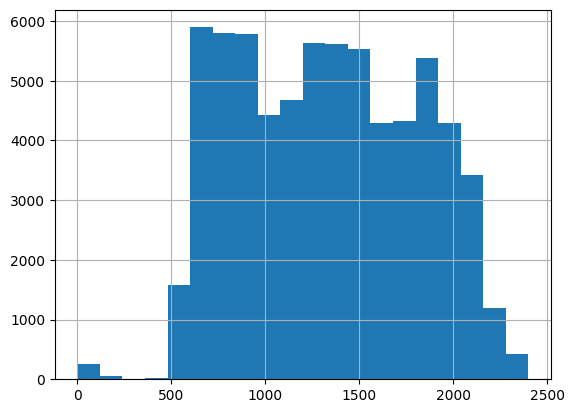

In [43]:
X['DepTime'].hist(bins=20)

<Axes: >

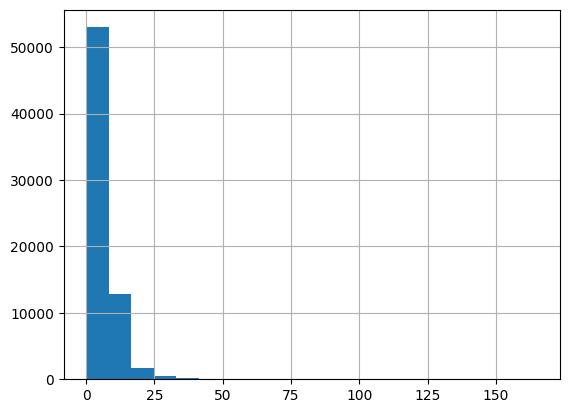

In [44]:
X['TaxiIn'].hist(bins=20)

<Axes: >

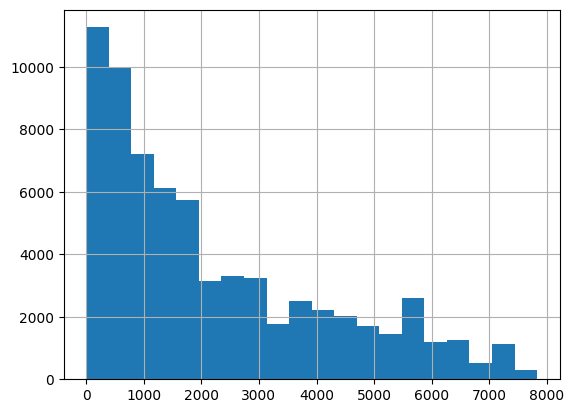

In [45]:
X['FlightNum'].hist(bins=20)

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [46]:
def transform_data(data):
    # Разделяем признаки на числовые и категориальные
    numeric_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()

    # Создаем преобразователь для числовых признаков (замена пропусков нулями и масштабирование)
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Заполнение пропусков нулями
        ('scaler', StandardScaler())  # Масштабирование
    ])

    # Создаем преобразователь для категориальных признаков (замена пропусков строкой 'nan' и one-hot-кодирование)
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='nan')),  # Заполнение пропусков строкой 'nan'
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Кодирование в числа
    ])

    # Объединяем преобразования для всех признаков
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    # Применяем преобразования к данным
    X_preprocessed = preprocessor.fit_transform(data)

    return X_preprocessed

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [47]:
# Предобработка данных (исключаем ненужные столбцы и пропуски)
columns_to_drop = ['ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'TailNum', 'Year']
flights_cleaned = flights.drop(columns=columns_to_drop).dropna(subset=['DepDelay'])
X = flights_cleaned.drop(columns=['DepDelay'])

# Применяем функцию transform_data к данным
X_transformed = transform_data(X)

# Определяем количество признаков после преобразования
num_features_after_transformation = X_transformed.shape[1]

num_features_after_transformation

634

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [89]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки в отношении 70/30
X_train, X_test, y_train, y_test = train_test_split(X_with_ones, y, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Создаем объект линейной регрессии
model = LinearRegression()

# Обучаем модель на 1000 объектах из обучающей выборки
model.fit(X_train[:1000], y_train[:1000])

# Предсказания на подвыборке и контрольной выборке
y_train_pred = model.predict(X_train[:1000])
y_test_pred = model.predict(X_test)

# Вычисляем MSE и R2 на подвыборке и контрольной выборке
mse_train = mean_squared_error(y_train[:1000], y_train_pred)
r2_train = r2_score(y_train[:1000], y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train, r2_train, mse_test, r2_test

(16.768193276054618,
 0.9822958499009466,
 1279.4884357803155,
 -0.05549447698530652)

[Текст ссылки](https://)Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [64]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import KFold

# Создаем объекты для кросс-валидации с 5 фолдами
kf = KFold(n_splits=5)

# Задаем сетку значений параметра регуляризации
alpha_grid = np.logspace(-4, 2, 100)

# Обучаем линейную регрессию с L1-регуляризацией (Lasso)
lasso_cv = LassoCV(alphas=alpha_grid, cv=kf)
lasso_cv.fit(X_train[:1000], y_train[:1000])

# Обучаем линейную регрессию с L2-регуляризацией (Ridge)
ridge_cv = RidgeCV(alphas=alpha_grid, cv=kf)
ridge_cv.fit(X_train[:1000], y_train[:1000])

# Предсказания на обучающей и контрольной выборках для Lasso
y_train_pred_lasso = lasso_cv.predict(X_train[:1000])
y_test_pred_lasso = lasso_cv.predict(X_test)

# Предсказания на обучающей и контрольной выборках для Ridge
y_train_pred_ridge = ridge_cv.predict(X_train[:1000])
y_test_pred_ridge = ridge_cv.predict(X_test)

# Вычисляем MSE и R2 на обучающей и контрольной выборках для Lasso
mse_train_lasso = mean_squared_error(y_train[:1000], y_train_pred_lasso)
r2_train_lasso = r2_score(y_train[:1000], y_train_pred_lasso)

mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Вычисляем MSE и R2 на обучающей и контрольной выборках для Ridge
mse_train_ridge = mean_squared_error(y_train[:1000], y_train_pred_ridge)
r2_train_ridge = r2_score(y_train[:1000], y_train_pred_ridge)

mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

mse_train_lasso, r2_train_lasso, mse_test_lasso, r2_test_lasso, mse_train_ridge, r2_train_ridge, mse_test_ridge, r2_test_ridge

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299.7941845414389, tolerance: 60.315794875
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 503.5226025566444, tolerance: 60.315794875
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 545.4316733290143, tolerance: 60.315794875
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Obj

(25.45804622273538,
 0.9731209520229246,
 513.5581124134144,
 0.5763480652853451,
 17.00333967656275,
 0.9820475782415429,
 1003.0365318660366,
 0.17256030614029427)

In [87]:
import pandas as pd

# Загрузка данных
url = "https://raw.githubusercontent.com/raffeekk/ML25/main/2008.csv"
flights = pd.read_csv(url)

# Проверяем первые строки данных
flights.head()

# Исключаем признаки, которые не будут использоваться в модели
columns_to_drop = ['ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'TailNum', 'Year']
flights_cleaned = flights.drop(columns=columns_to_drop).dropna(subset=['DepDelay'])

# Разделяем данные на матрицу признаков X и вектор целевой переменной y
X = flights_cleaned.drop(columns=['DepDelay'])
y = flights_cleaned['DepDelay']

# Преобразуем категориальные признаки в числовые с помощью one-hot encoding
X = pd.get_dummies(X)

# Масштабирование вещественных признаков
from sklearn.preprocessing import StandardScaler

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Добавляем единичный признак к обучающей выборке
X_with_ones = np.hstack((np.ones((X.shape[0], 1)), X.values))

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [102]:
import numpy as np

# Проверяем, что X_train и X_test являются двумерными массивами NumPy
if len(X_train.shape) == 1:
    X_train = X_train.values.reshape(-1, 1)
if len(X_test.shape) == 1:
    X_test = X_test.values.reshape(-1, 1)

# Добавляем единичный признак к обучающей выборке
X_train_with_ones = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

# Добавляем единичный признак к тестовой выборке
X_test_with_ones = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [103]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return np.dot(X, w)


In [104]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    predictions = make_pred(X, w)
    # Избегаем деления на ноль, используя np.where
    errors = np.where(y == 0, 0, (predictions - y) / y)
    mspe = np.mean(errors ** 2)
    return mspe

In [105]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    predictions = make_pred(X, w)
    # Избегаем деления на ноль, используя np.where
    errors = np.where(y == 0, 0, (predictions - y) / y)
    grad = (2 / len(y)) * np.dot(X.T, errors)
    return grad

In [106]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y, lambda_):
    mspe = get_func(w, X, y)
    reg_term = lambda_ * np.sum(w ** 2)
    return mspe + reg_term

In [107]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y, lambda_):
    grad = get_grad(w, X, y)
    reg_grad = 2 * lambda_ * w
    return grad + reg_grad

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.

Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [108]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg=False, lambda_=0.1):
    # Инициализируем вектор весов нулями
    w = np.zeros(X.shape[1])
    func_values = []

    for i in range(max_iter):
        if is_reg:
            func_value = get_reg_func(w, X, y, lambda_)
            grad = get_reg_grad(w, X, y, lambda_)
        else:
            func_value = get_func(w, X, y)
            grad = get_grad(w, X, y)

        func_values.append(func_value)

        # Обновляем вектор весов
        w_new = w - step_size * grad

        # Проверяем критерий останова
        if np.linalg.norm(w_new - w) < eps:
            break

        w = w_new

    return w, func_values

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

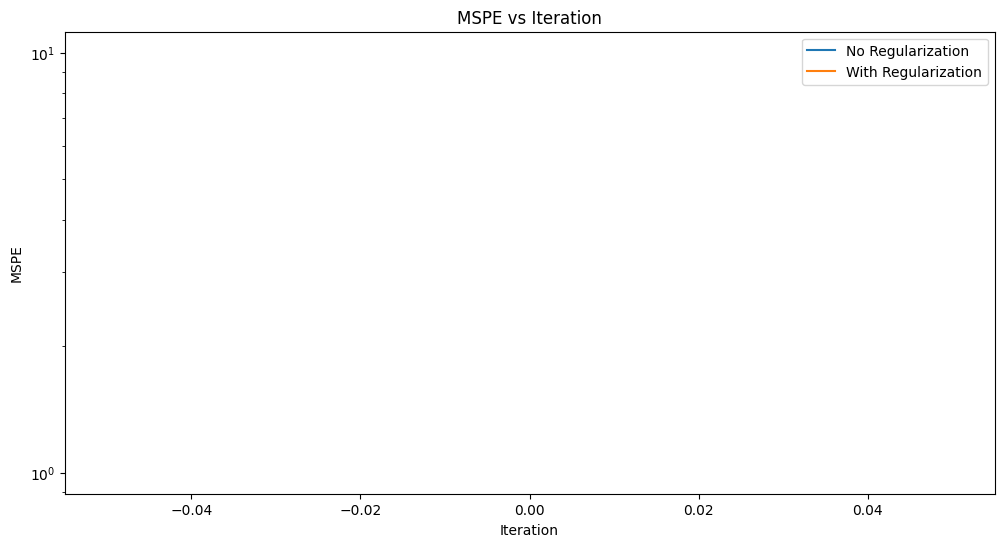

In [110]:
import matplotlib.pyplot as plt

# Значения параметров
step_size = 0.01
max_iter = 1000
eps = 1e-6
lambda_ = 0.1  # Коэффициент регуляризации

# Обучение без регуляризации
w_no_reg, func_values_no_reg = grad_descent(X_train_non_zero[:1000], y_train_non_zero[:1000], step_size, max_iter, eps, is_reg=False)

# Обучение с регуляризацией
w_reg, func_values_reg = grad_descent(X_train_non_zero[:1000], y_train_non_zero[:1000], step_size, max_iter, eps, is_reg=True, lambda_=lambda_)

# Построение графиков
plt.figure(figsize=(12, 6))

plt.plot(func_values_no_reg, label='No Regularization')
plt.plot(func_values_reg, label='With Regularization')

plt.title('MSPE vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('MSPE')
plt.yscale('log')  # Используем логарифмическую шкалу для лучшей визуализации
plt.legend()
plt.show()

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту.

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [116]:
def sgd(X, y, step_size, max_iter, eps, is_reg=False, lambda_=0.1):
    # Инициализируем вектор весов нулями
    w = np.zeros(X.shape[1])
    func_values = []

    for i in range(max_iter):
        # Выбираем случайный объект из обучающей выборки
        idx = np.random.randint(0, X.shape[0])
        x_i = X[idx]
        y_i = y[idx]

        if is_reg:
            func_value = get_reg_func(w, X, y, lambda_)
            grad = get_reg_grad(w, x_i.reshape(1, -1), np.array([y_i]), lambda_)
        else:
            func_value = get_func(w, X, y)
            grad = get_grad(w, x_i.reshape(1, -1), np.array([y_i]))

        func_values.append(func_value)

        # Обновляем вектор весов
        w_new = w - step_size * grad.flatten()

        # Проверяем критерий останова
        if np.linalg.norm(w_new - w) < eps:
            break

        w = w_new

    return w, func_values

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here